In [42]:
# Group Name: The Awesome Sauce Data Scientist
# Name: Aryaman Srivastava
# Email: asriva10@stevens.edu
# Country: US
# College: Stevens Institute of Technology
# Specialization: Data Science


# Problem Description:
# ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding
# whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

# github link: https://github.com/AryaSriva/FinalProjectDataGlacier

In [43]:
import pandas as pd
from sklearn.impute import KNNImputer
from scipy import stats
import numpy as np
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df2 = pd.read_csv("bank-full.csv", delimiter=";")
df3 = pd.read_csv("bank.csv", delimiter=";")
df4 = pd.read_csv("bank-additional.csv", delimiter=";")

merged_additional_df = pd.concat([df4, df], ignore_index=True)
merged_bank_df = pd.concat([df3, df2], ignore_index=True)

# replace NA values with mean for numerical columns
merged_additional_df["age"] = merged_additional_df["age"].fillna(merged_additional_df["age"].mean())
merged_additional_df["campaign"] = merged_additional_df["campaign"].fillna(merged_additional_df["campaign"].mean())
merged_additional_df["pdays"] = merged_additional_df["pdays"].fillna(merged_additional_df["pdays"].mean())
merged_additional_df["previous"] = merged_additional_df["previous"].fillna(merged_additional_df["previous"].mean())
merged_additional_df["emp.var.rate"] = merged_additional_df["emp.var.rate"].fillna(merged_additional_df["emp.var.rate"].mean())
merged_additional_df["cons.price.idx"] = merged_additional_df["cons.price.idx"].fillna(merged_additional_df["cons.price.idx"].mean())
merged_additional_df["cons.conf.idx"] = merged_additional_df["cons.conf.idx"].fillna(merged_additional_df["cons.conf.idx"].mean())
merged_additional_df["euribor3m"] = merged_additional_df["euribor3m"].fillna(merged_additional_df["euribor3m"].mean())
merged_additional_df["nr.employed"] = merged_additional_df["nr.employed"].fillna(merged_additional_df["nr.employed"].mean())

merged_bank_df["age"] = merged_bank_df["age"].fillna(merged_bank_df["age"].mean())
merged_bank_df["balance"] = merged_bank_df["balance"].fillna(merged_bank_df["balance"].mean())
merged_bank_df["duration"] = merged_bank_df["duration"].fillna(merged_bank_df["duration"].mean())
merged_bank_df["campaign"] = merged_bank_df["campaign"].fillna(merged_bank_df["campaign"].mean())
merged_bank_df["pdays"] = merged_bank_df["pdays"].fillna(merged_bank_df["pdays"].mean())
merged_bank_df["previous"] = merged_bank_df["previous"].fillna(merged_bank_df["previous"].mean())


#remove outliers using IQR rule
numerical_cols = [
    "age",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
]
numerical_df = merged_additional_df[numerical_cols]
categorical_cols = merged_additional_df.columns.difference(numerical_cols)
Q1 = numerical_df[numerical_cols].quantile(0.25)
Q3 = numerical_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
numerical_df = numerical_df[
    ~(
        (numerical_df[numerical_cols] < (Q1 - 1.5 * IQR))
        | (numerical_df[numerical_cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]
merged_additional_df = merged_additional_df.loc[numerical_df.index]
merged_additional_df = pd.concat(
    [numerical_df, merged_additional_df[categorical_cols]], axis=1
)

numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
numerical_df = merged_bank_df[numerical_cols]
categorical_cols = merged_bank_df.columns.difference(numerical_cols)
Q1 = numerical_df[numerical_cols].quantile(0.25)
Q3 = numerical_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
numerical_df = numerical_df[
    ~(
        (numerical_df[numerical_cols] < (Q1 - 1.5 * IQR))
        | (numerical_df[numerical_cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]
merged_bank_df = merged_bank_df.loc[numerical_df.index]
merged_bank_df = pd.concat([numerical_df, merged_bank_df[categorical_cols]], axis=1)


<Axes: xlabel='job,age_group'>

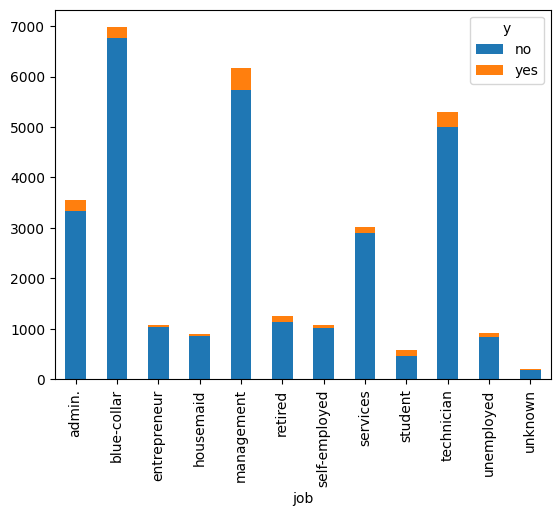

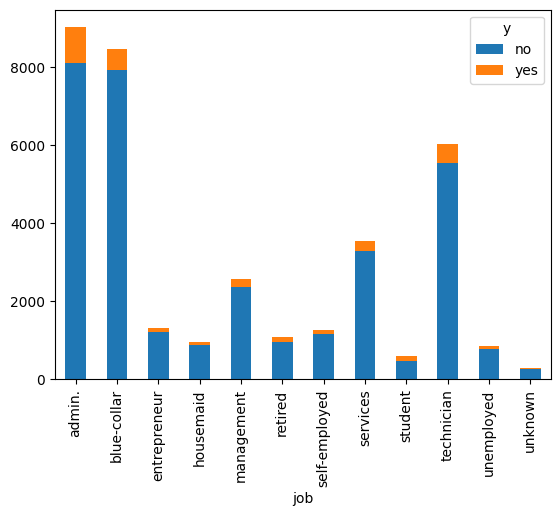

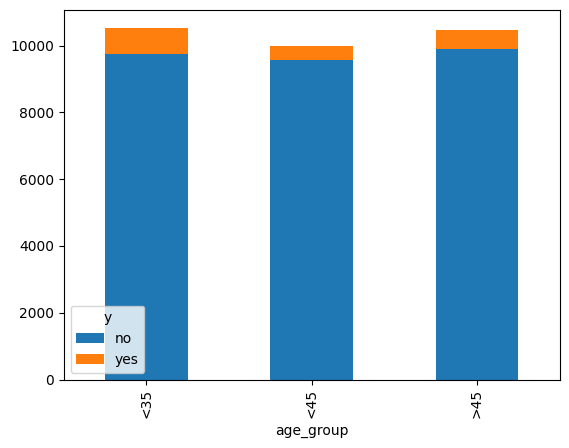

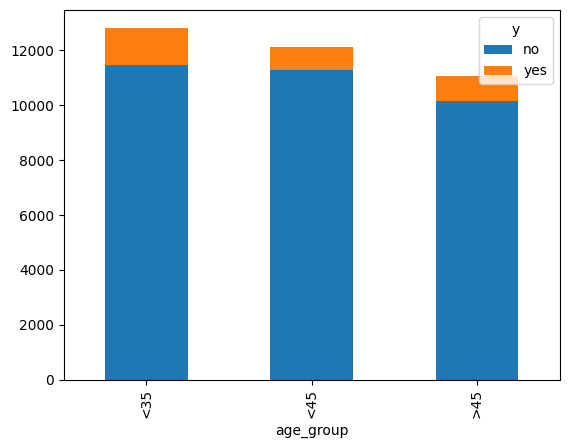

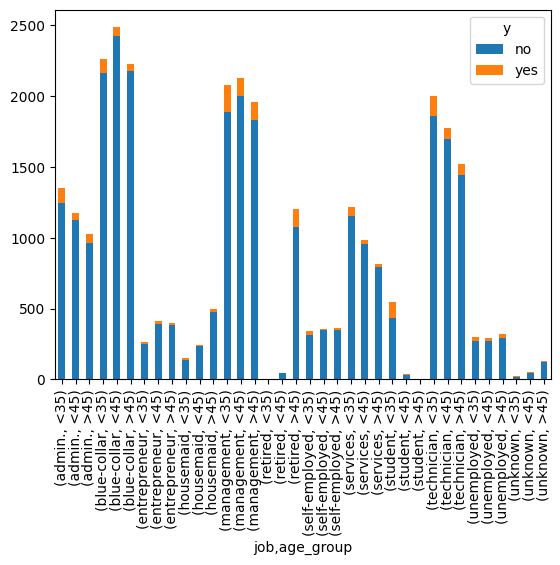

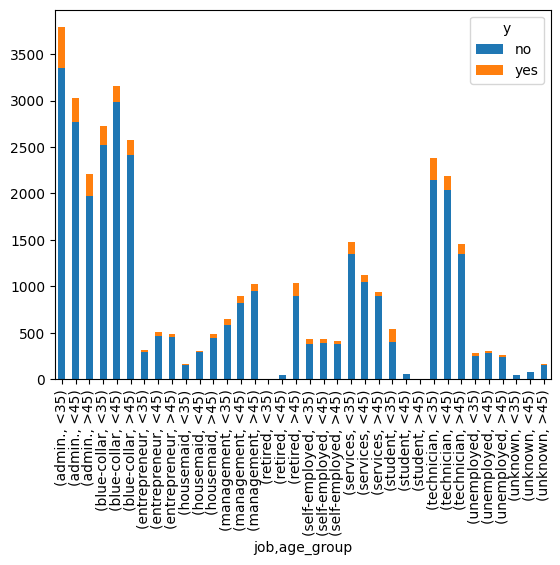

In [44]:
# Hypothesis #1: The person's occupation and age affect the likelyhood that they will buy the product, in otherwords, do more people from a certain occupation and age group in that occupation buy more of the product than people of another occupation
def age_group(x):
    if x < 35:
        return "<35"
    elif x < 45:
        return "<45"
    else: 
        return ">45"
merged_bank_df["age_group"] = merged_bank_df["age"].apply(age_group)
merged_additional_df["age_group"] = merged_additional_df["age"].apply(age_group)

# plot each attribute individually first and then combine them
occupation = merged_bank_df.groupby(["job", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)
occupation = merged_additional_df.groupby(["job", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)

occupation = merged_bank_df.groupby(["age_group", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)
occupation = merged_additional_df.groupby(["age_group", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)

occupation = merged_bank_df.groupby(["job", "age_group", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)
occupation = merged_additional_df.groupby(["job", "age_group", "y"]).size().unstack()
occupation.plot(kind="bar", stacked=True)

<Axes: xlabel='marital,education'>

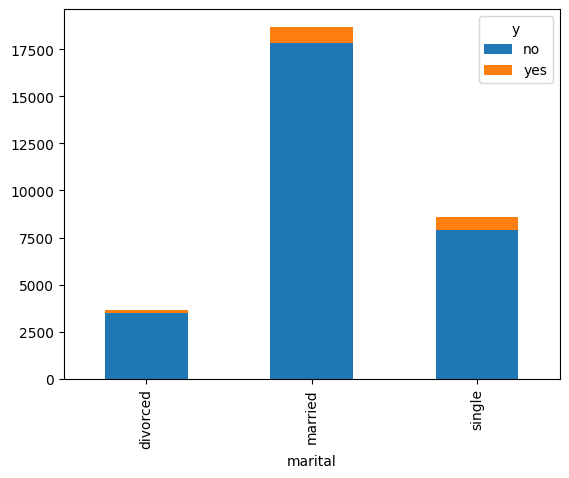

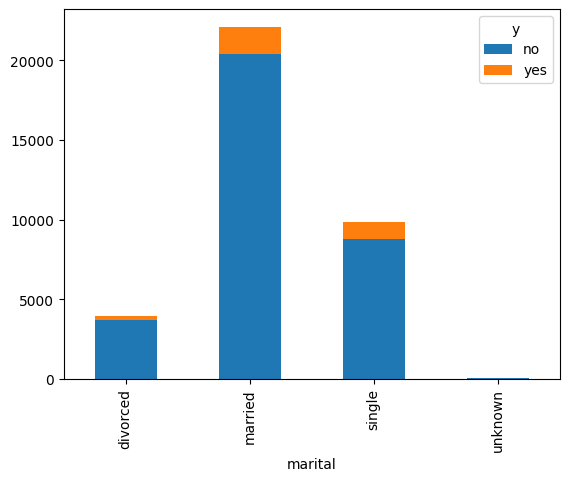

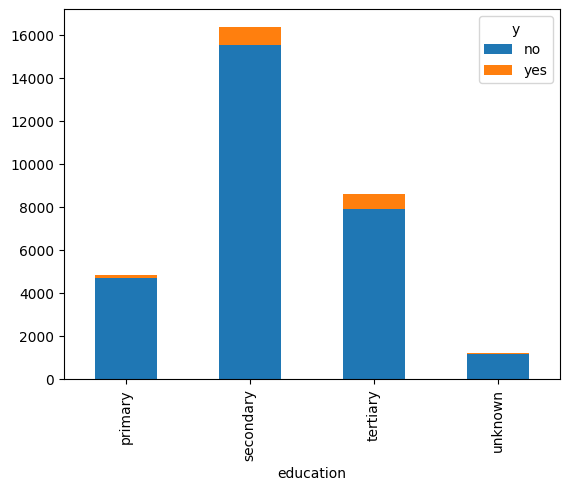

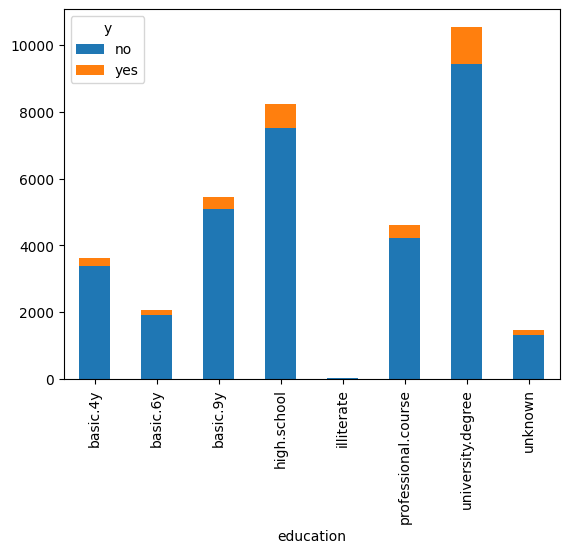

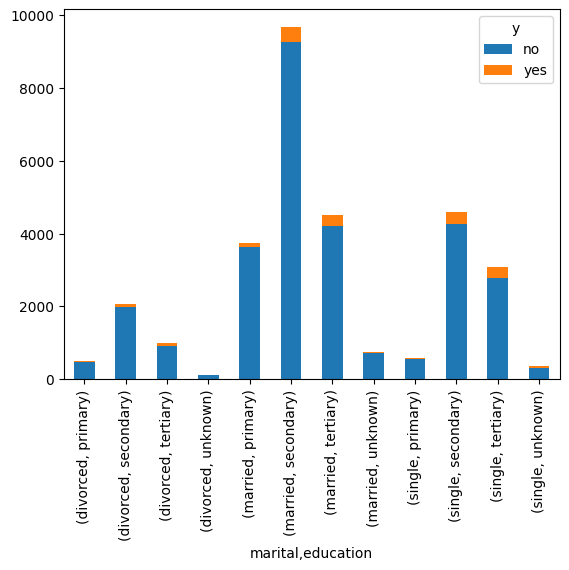

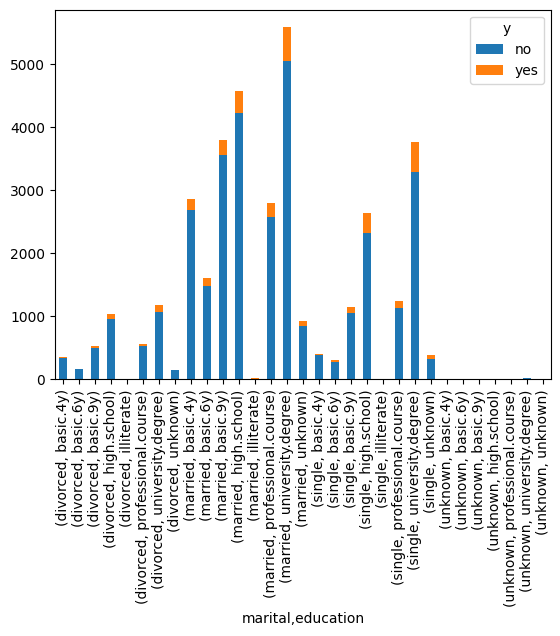

In [45]:
# Hypothesis No.2 -- The person's marital status and education level influences their decision to buy or not buy the product

# plot each attribute individually first and then combine them(maybe married couples of a certain age are more likely to buy the product)
marital = merged_bank_df.groupby(["marital", "y"]).size().unstack()
marital.plot(kind="bar", stacked=True)
marital = merged_additional_df.groupby(["marital", "y"]).size().unstack()
marital.plot(kind="bar", stacked=True)

education = merged_bank_df.groupby(["education", "y"]).size().unstack()
education.plot(kind="bar", stacked=True)
education = merged_additional_df.groupby(["education", "y"]).size().unstack()
education.plot(kind="bar", stacked=True)

marital_education = merged_bank_df.groupby(["marital", "education", "y"]).size().unstack()
marital_education.plot(kind="bar", stacked=True)
marital_education = merged_additional_df.groupby(["marital", "education", "y"]).size().unstack()
marital_education.plot(kind="bar", stacked=True)

<Axes: xlabel='balance_group'>

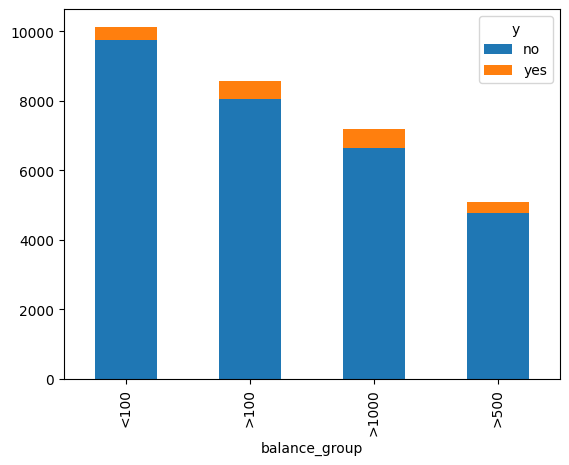

In [46]:
# Hypothesis No. 3 --- The person's balance influences their decision
def balance(x):
    if x > 1000:
        return ">1000"
    elif x > 500:
        return ">500"
    elif x > 100:
        return ">100"
    else:
        return "<100"
merged_bank_df["balance_group"] = merged_bank_df["balance"].apply(balance)
balance = merged_bank_df.groupby(["balance_group", "y"]).size().unstack()
balance.plot(kind="bar", stacked=True)

<Axes: xlabel='loan'>

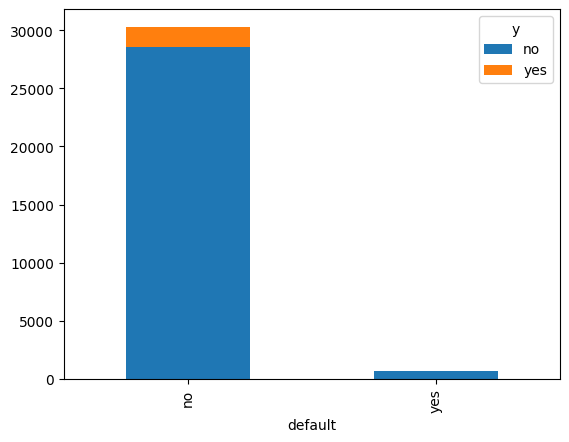

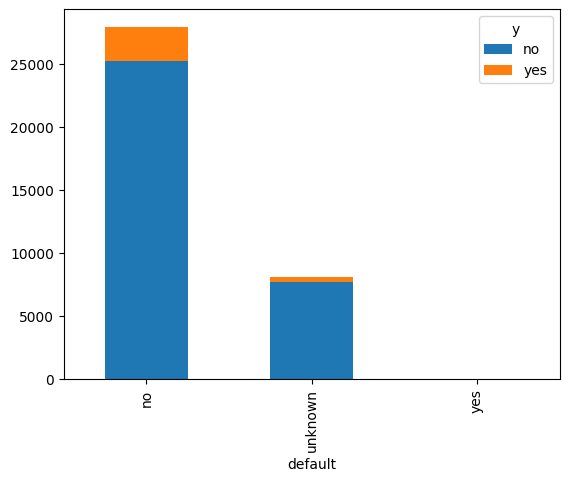

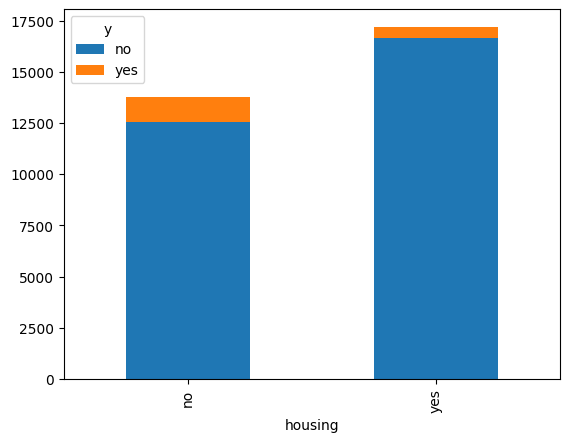

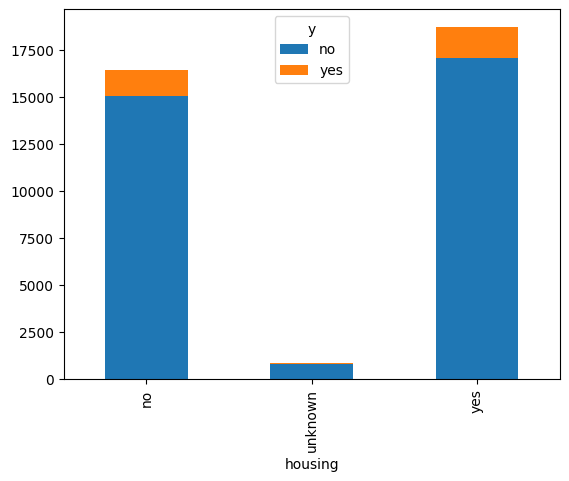

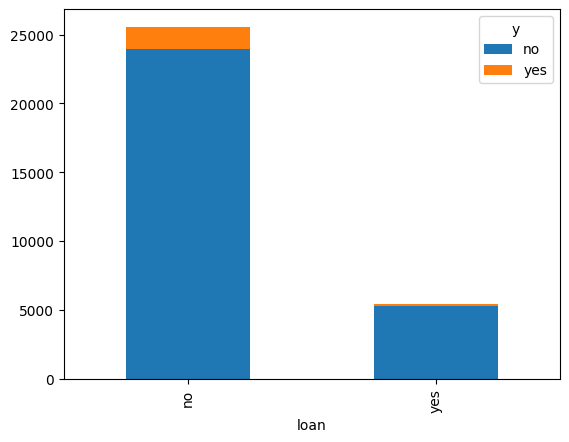

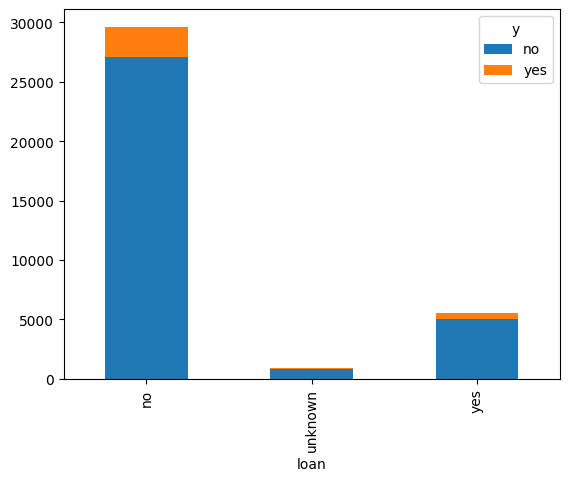

In [47]:
# Hypothesis No. 4 -- The person's default, housing, and loan influence their decision

default = merged_bank_df.groupby(["default", "y"]).size().unstack()
default.plot(kind="bar", stacked="True")
default = merged_additional_df.groupby(["default", "y"]).size().unstack()
default.plot(kind="bar", stacked="True")
housing = merged_bank_df.groupby(["housing", "y"]).size().unstack()
housing.plot(kind="bar", stacked="True")
housing = merged_additional_df.groupby(["housing", "y"]).size().unstack()
housing.plot(kind="bar", stacked="True")
loan = merged_bank_df.groupby(["loan", "y"]).size().unstack()
loan.plot(kind="bar", stacked="True")
loan = merged_additional_df.groupby(["loan", "y"]).size().unstack()
loan.plot(kind="bar", stacked="True")

<Axes: xlabel='campaign'>

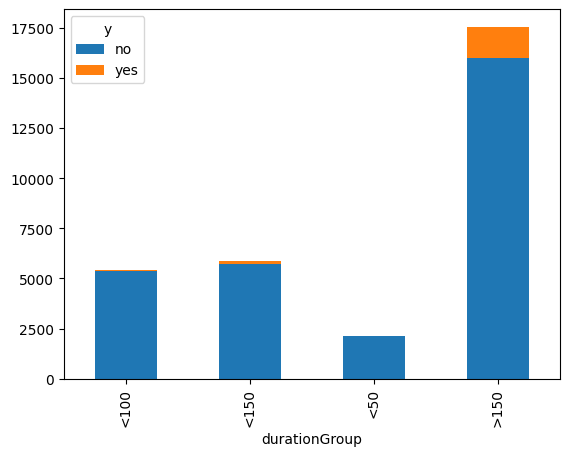

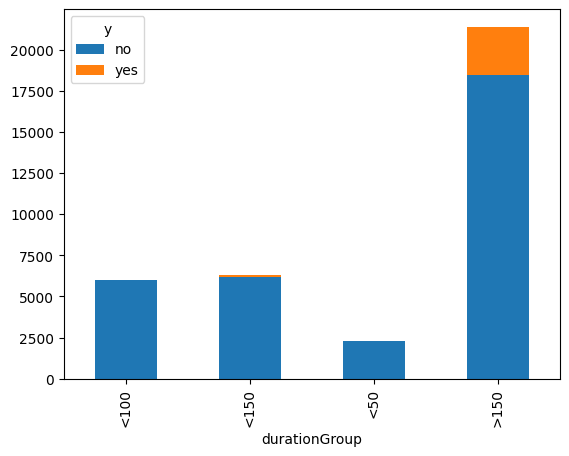

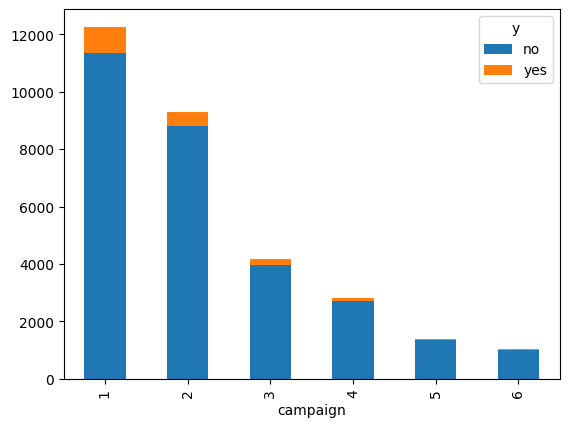

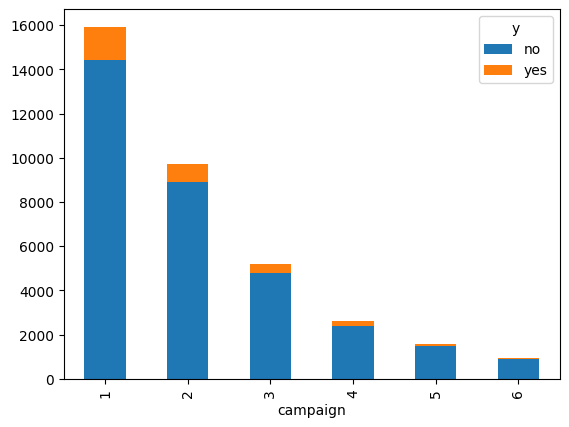

In [48]:
# Hypothesis No. 5 -- The duration and campaign influences the person's decision
def duration(x):
    if x < 50:
        return "<50"
    elif x < 100:
        return "<100"
    elif x < 150:
        return "<150"
    else:
        return ">150"

merged_additional_df["durationGroup"] = merged_additional_df["duration"].apply(duration)
merged_bank_df["durationGroup"] = merged_bank_df["duration"].apply(duration)
duration = merged_bank_df.groupby(["durationGroup", "y"]).size().unstack()
duration.plot(kind="bar", stacked="True")
duration = merged_additional_df.groupby(["durationGroup", "y"]).size().unstack()
duration.plot(kind="bar", stacked="True")
campaign = merged_bank_df.groupby(["campaign", "y"]).size().unstack()
campaign.plot(kind="bar", stacked="True")
campaign = merged_additional_df.groupby(["campaign", "y"]).size().unstack()
campaign.plot(kind="bar", stacked="True")

<Axes: xlabel='poutcome'>

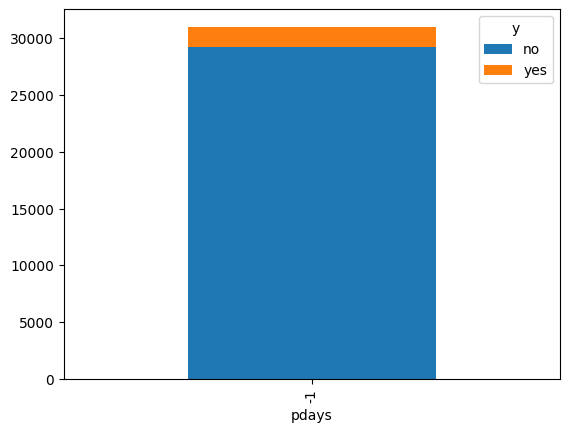

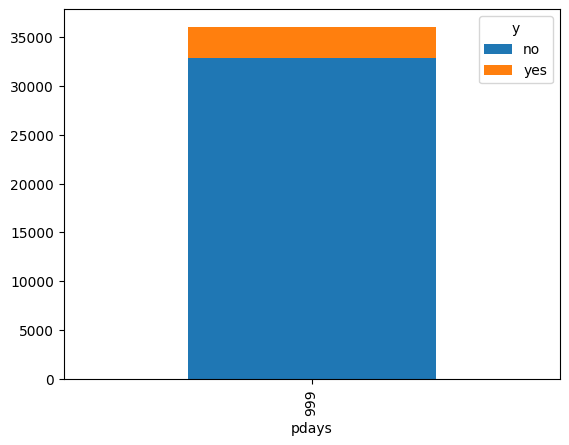

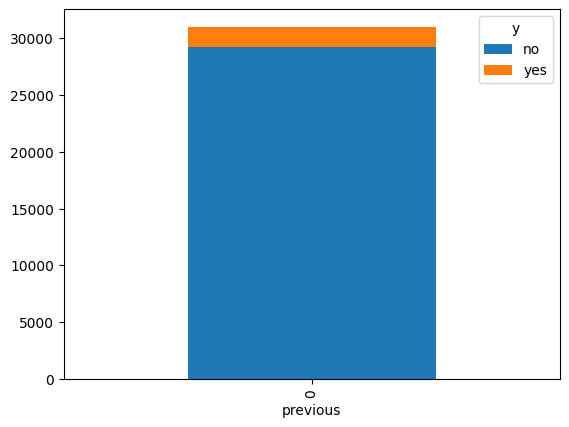

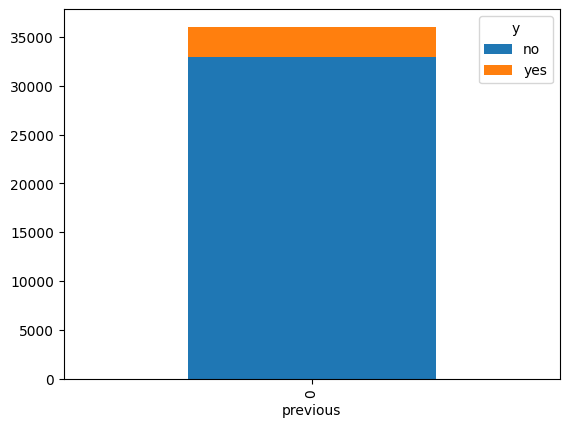

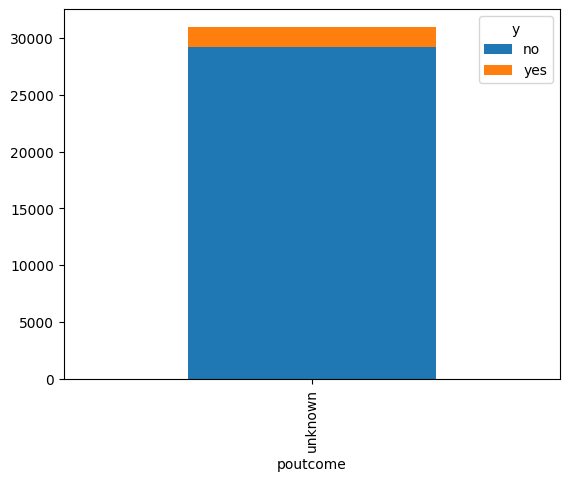

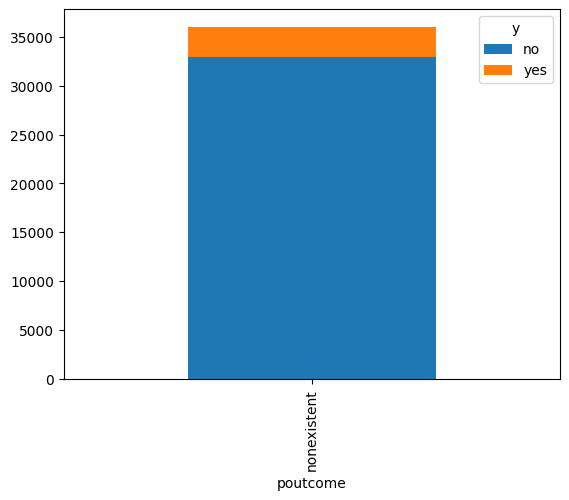

In [49]:
# Hypothesis No. 6 -- The pdays, previous, and poutcome affects people's decision
pdays = merged_bank_df.groupby(["pdays", "y"]).size().unstack()
pdays.plot(kind="bar", stacked="True")
pdays = merged_additional_df.groupby(["pdays", "y"]).size().unstack()
pdays.plot(kind="bar", stacked="True")
previous = merged_bank_df.groupby(["previous", "y"]).size().unstack()
previous.plot(kind="bar", stacked="True")
previous = merged_additional_df.groupby(["previous", "y"]).size().unstack()
previous.plot(kind="bar", stacked="True")
poutcome = merged_bank_df.groupby(["poutcome", "y"]).size().unstack()
poutcome.plot(kind="bar", stacked="True")
poutcome = merged_additional_df.groupby(["poutcome", "y"]).size().unstack()
poutcome.plot(kind="bar", stacked="True")

<Axes: xlabel='cons.conf.idx'>

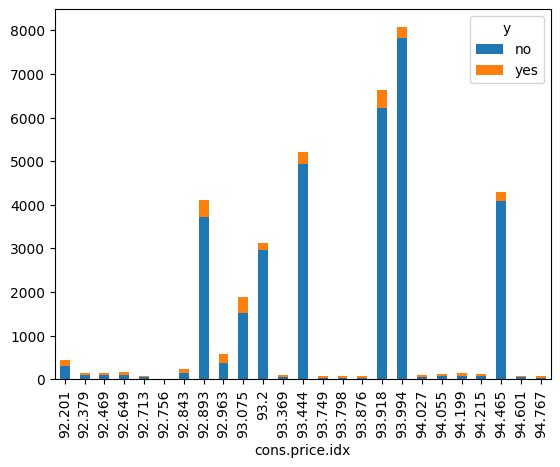

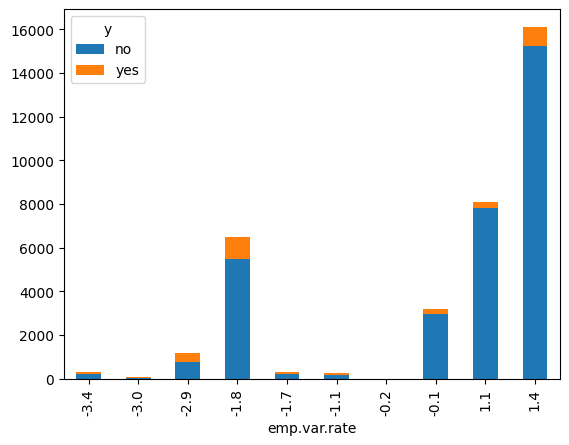

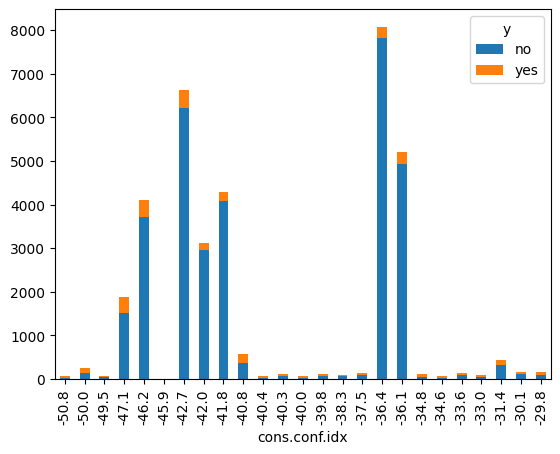

In [50]:
# Hypothesis No. 7 --- Price Index, Employment Variation Index, and Confidence Index influence consumer's decision
p_index = merged_additional_df.groupby(["cons.price.idx", "y"]).size().unstack()
p_index.plot(kind="bar", stacked=True) 
evar = merged_additional_df.groupby(["emp.var.rate", "y"]).size().unstack()
evar.plot(kind="bar", stacked=True)
conf = merged_additional_df.groupby(["cons.conf.idx", "y"]).size().unstack()
conf.plot(kind="bar", stacked=True)

<Axes: xlabel='nr.employed'>

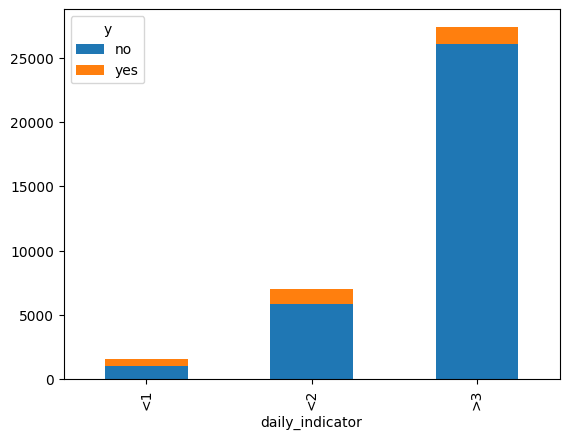

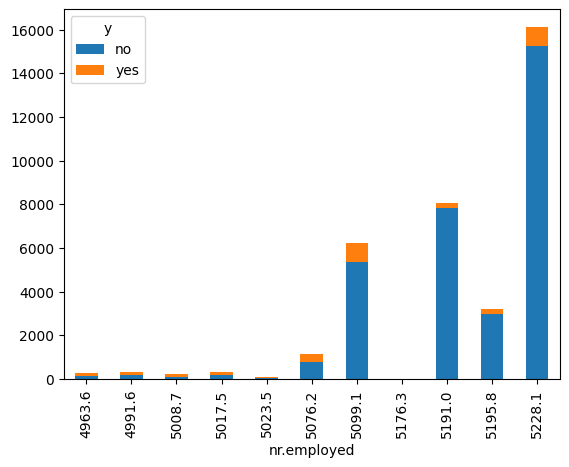

In [56]:
# Hypothesis No.8 Does the daily and quarterly indicator affect their decision?
def indicator(x):
    if x < 1:
        return "<1"
    elif x < 2:
        return "<2"
    elif x < 3:
        return "<3"
    else:
        return ">3"
merged_additional_df["daily_indicator"] = merged_additional_df["euribor3m"].apply(indicator)
daily = merged_additional_df.groupby(["daily_indicator", "y"]).size().unstack()
daily.plot(kind="bar", stacked=True)
quarterly = merged_additional_df.groupby(["nr.employed", "y"]).size().unstack()
quarterly.plot(kind="bar", stacked=True)

In [ ]:
#Final Recommendation

# Based on the data and subsequent exploratory data analysis, I believe it would be best to shortlist clients who are less than 35 years of age or greater than 45 years of age, clients who are married and at least have had their secondary education. In addition, we should
#shortlist clients who work in management, blue-collar, or technician. Clients who have a balance higher than 1000 are more likely to buy the product. Clients who don't have any type of loan(personal or housing) and doesn't have credit in default are more likely to buy the product
#and should be shortlisted. Clients who were only contacted once and had a longer duration of contact should be shortlisted. The outcome of the previous marketing campaign, number of contacts performed before the contact, and the number of days since the client was last contacted doesn't
#seem to affect the likelyhood that a client will buy the product. Clients with a higher 3 month rate and a number of employees above 5000 should be shortlisted. Clients with a price index close to 93 should be shortlisted. Clients with a confidence index between -42 and -47 should be
#shortlisted. Finally, clients with employment variation rate -2.9, -1.8, and 1.4 should be shortlisted